In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
# import flare_prob
from aflare import aflare1
from scipy.signal import fftconvolve, correlate
from scipy.stats import skew

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

## Make fake data

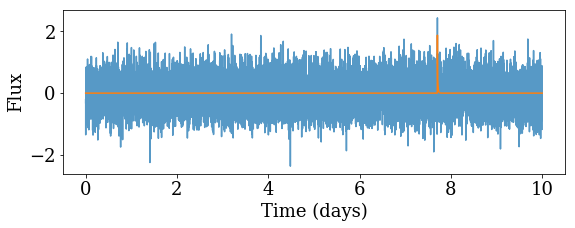

0.0336562200564
0.0475351698479


In [83]:
dt = 1./24./60. # 1 min
tmax = 10

time = np.arange(0, tmax, dt)
noise = np.random.randn(len(time)) * 0.5

# create a bunch of randomly generated flares to "hide" in the white noise
input_tau = 5. * dt # all flares have same timescale

ampl_range = [1.5, 2.5] # range of flare amplitudes
Nflares = 1

t_peak = np.random.random(Nflares) * tmax
ampl = np.random.random(Nflares) * (ampl_range[1] - ampl_range[0]) + ampl_range[0]

flux = np.zeros_like(time)
for k in range(Nflares):
    flux = flux + aflare1(time, t_peak[k], input_tau, ampl[k], upsample=True)

plt.figure(figsize=(9,3))
plt.plot(time, flux + noise, alpha=0.75)
plt.plot(time, flux)
plt.xlabel('Time (days)')
plt.ylabel('Flux')
plt.show()


print(skew(noise))
print(skew(flux+noise))

## compute the skew versus timescale

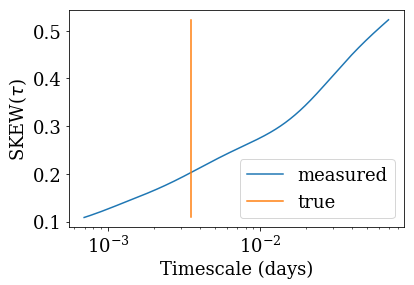

In [84]:
# range of flare model timescales to try
model_tau = np.arange(dt, 100*dt, 0.1*dt)

# skewness measured as a function of tau
skew_out = np.zeros_like(model_tau)


for k in range(len(model_tau)):
    # the model to be correlated against the data each time
    # centered w/ the flare @ 1
    model = aflare1(np.arange(0,2,dt), 1, model_tau[k], 1, upsample=True)

    # center about zero (per Hogg suggestion)
    model = model - np.mean(model)
    # make the dot(model,model)=1 (per Hogg suggestion)
    model = model / np.sqrt(np.sum(model**2))
    
    # THE WAY WE DID AT TESS.NINJA:
    # normalize model to have sum=1
    # model = model / np.sum(model)


    conv = fftconvolve(flux+noise, model, mode='same')
    skew_out[k] = skew(conv) 

plt.figure()
plt.plot(model_tau, skew_out, label='measured')
plt.plot([input_tau, input_tau], [min(skew_out), max(skew_out)], label='true')
plt.legend()
plt.xscale('log')
plt.xlabel('Timescale (days)')
plt.ylabel(r'SKEW($\tau$)')
plt.show()

## explore the convolution vs $\tau$

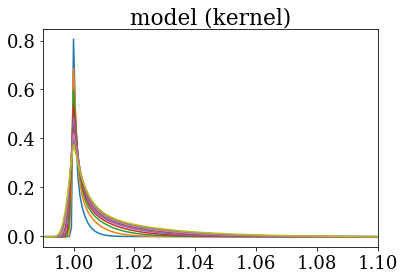

In [85]:
# range of flare model timescales to try
model_tau = np.arange(dt, 10*dt, 1*dt)

# skewness measured as a function of tau
skew_out = np.zeros_like(model_tau)


for k in range(len(model_tau)):
    # the model to be correlated against the data each time
    # centered w/ the flare @ 1
    model = aflare1(np.arange(0,2,dt), 1, model_tau[k], 1, upsample=True)

    # center about zero (per Hogg suggestion)
    model = model - np.mean(model)
    # make the dot(model,model)=1 (per Hogg suggestion)
    model = model / np.sqrt(np.sum(model**2))
    
    # THE WAY WE DID AT TESS.NINJA:
    # normalize model to have sum=1
    # model = model / np.sum(model)


    conv = fftconvolve(flux+noise, model, mode='same')

    plt.plot(np.arange(0,2,dt), model, label='model')

plt.xlim(.99,1.1)
plt.title('model (kernel)')
plt.show()


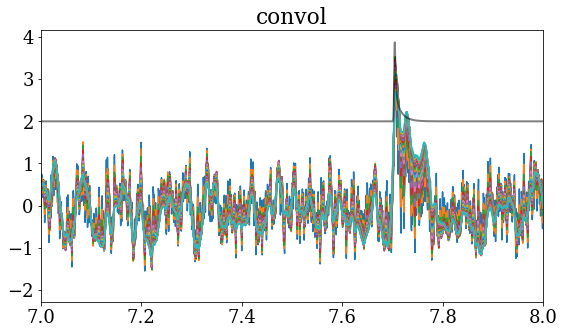

In [87]:
# range of flare model timescales to try
model_tau = np.arange(dt, 20*dt, 1*dt)

# skewness measured as a function of tau
skew_out = np.zeros_like(model_tau)

plt.figure(figsize=(9,5))
for k in range(len(model_tau)):
    # the model to be correlated against the data each time
    # centered w/ the flare @ 1
    model = aflare1(np.arange(0,2,dt), 1, model_tau[k], 1, upsample=True)

    # center about zero (per Hogg suggestion)
    model = model - np.mean(model)
    # make the dot(model,model)=1 (per Hogg suggestion)
    model = model / np.sqrt(np.sum(model**2))
    
    # THE WAY WE DID AT TESS.NINJA:
    # normalize model to have sum=1
    # model = model / np.sum(model)


    conv = fftconvolve(flux+noise, model, mode='same')
    skew_out[k] = skew(conv) 

    plt.plot(time, conv, label=str(k))

plt.xlim(7,8)
plt.plot(time, flux+2, lw=2, alpha=0.5, c='k')
plt.title('convol')
plt.show()

